# Evolutionary algorithm

## 1. Install dependencies

In [1]:
# %pip install numpy

## 2. Declaration of functions to optimize

In [2]:
import numpy as np

In [3]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

## 2. Creating algorithm

### 2.1 Useful functions declaration

In [4]:
def calculate_scores(population, function):
    return np.array([function(gen) for gen in population])

In [5]:
def selection(population, fitness_scores):
    inverted_fitness_scores = 1 / (fitness_scores + 1e-6)
    total_fitness = np.sum(inverted_fitness_scores)
    selection_probabilities = inverted_fitness_scores / total_fitness
    
    parents_indices = np.random.choice(np.arange(len(population)), size=len(population), p=selection_probabilities)
    parents = population[parents_indices]
    return parents

In [6]:
def crossover(parents, pc):
    children = np.zeros_like(parents)
    for i in range(len(parents)):
        if np.random.rand() < pc:
            parent1 = parents[np.random.randint(len(parents))]
            parent2 = parents[np.random.randint(len(parents))]
            children[i] = np.array([parent1[0], parent2[1]])
        else:
            children[i] = parents[i]
    return children

In [7]:
def mutate(children, pm, distance=100):
    for i in range(len(children)):
        for j in range(2):
            if np.random.rand() < pm:
                children[i][j] = np.random.uniform(-distance, distance)
    return children

### 2.2 Algorithm implementation

In [34]:
def evolutionary_algorithm(function, base_length=1000, max_iter=1000, pm=0.01, pc=0.7, solution_check=50):

    all_populations = []
    all_fitness_scores = []

    population = np.random.uniform(-100, 100, size=(base_length, 2))
    best_solutions = []
    best_scores = []
    iterations = max_iter

    solution_check = max_iter // 10

    for i in range(max_iter):
        # Rating individuals
        fitness_scores = calculate_scores(population, function)
        all_populations.append(population)
        all_fitness_scores.append(fitness_scores)

        # Parent selection
        parents = selection(population, fitness_scores)

        # Crossover
        children = crossover(parents, pc)

        # Mutation and succession
        population = mutate(children, pm)
    
        solution = population[np.argmin(calculate_scores(population, function))]
        solution_score = function(solution)
        best_solutions.append(solution)
        best_scores.append(solution_score)

        if i % solution_check == 0 and i > 0:
            print(f"Simulating generation {i}. This generation info:")
            print(f"Lowest score: {solution_score}\nBest solution: {solution}")
            if np.round(best_scores[-1], 8) == np.round(best_scores[i - solution_check], 8):
                iterations = i
                break

    return best_solutions, best_scores, all_populations, all_fitness_scores, iterations


## 3. Application on functions

#### Useful functions

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def plot_scores(scores):
    plt.plot(scores)
    plt.xlabel('Generations')
    plt.ylabel('Best scores')

### 3.1 Himmelblau's function

In [36]:
base_lenght = 1000
max_iter = 10000
pm = 0.01
pc = 0.7
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 1000. This generation info:
Lowest score: 0.001039557670708093
Best solution: [-2.80541056  3.12623607]
Simulating generation 2000. This generation info:
Lowest score: 0.0003676469897094252
Best solution: [-2.80541056  3.1283039 ]
Simulating generation 3000. This generation info:
Lowest score: 0.0003676469897094252
Best solution: [-2.80541056  3.1283039 ]


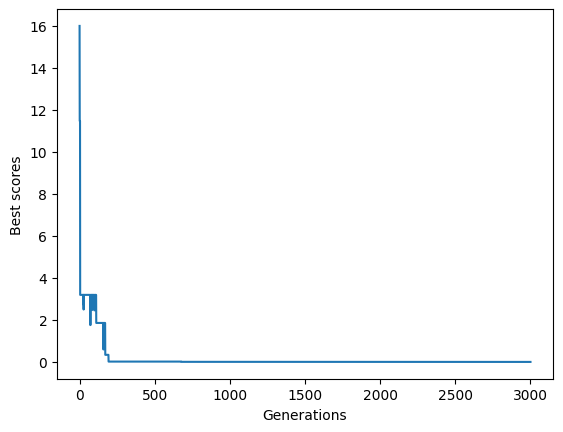

In [37]:
plot_scores(scores)

In [13]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.7
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.004662045536282116
Best solution: [-3.7702553  -3.28279517]
Simulating generation 200. This generation info:
Lowest score: 0.004662045536282116
Best solution: [-3.7702553  -3.28279517]


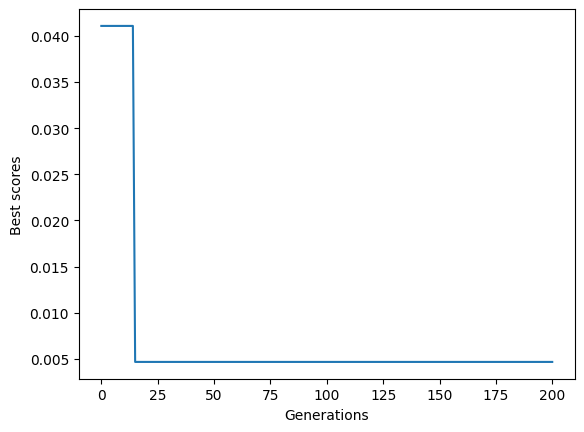

In [14]:
plot_scores(scores)

### 3.2 Ackley's function

In [15]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.7
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.14345497299238774
Best solution: [-0.01081982  0.03598128]
Simulating generation 200. This generation info:
Lowest score: 0.022863514325401457
Best solution: [0.00674316 0.00339016]
Simulating generation 300. This generation info:
Lowest score: 0.022863514325401457
Best solution: [0.00674316 0.00339016]


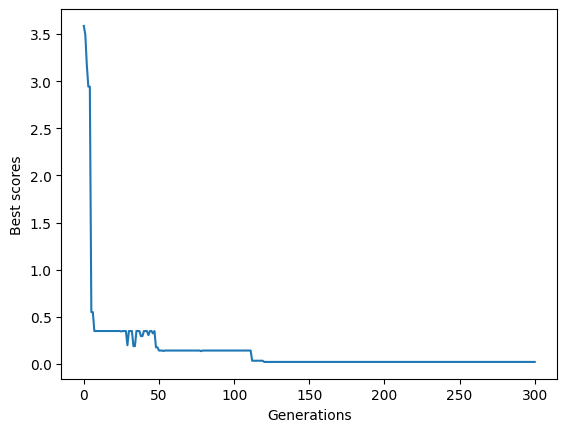

In [16]:
plot_scores(scores)

In [17]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.9
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.7048426702031212
Best solution: [ 0.04382146 -0.1144303 ]
Simulating generation 200. This generation info:
Lowest score: 0.4395307676163793
Best solution: [ 0.04382146 -0.0755221 ]
Simulating generation 300. This generation info:
Lowest score: 0.18007645882540801
Best solution: [ 0.04382146 -0.01000141]
Simulating generation 400. This generation info:
Lowest score: 0.18007645882540801
Best solution: [ 0.04382146 -0.01000141]


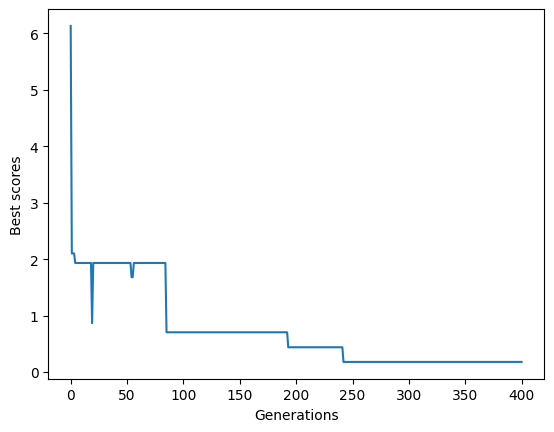

In [18]:
plot_scores(scores)

In [19]:
base_lenght = 1000
max_iter = 1000
pm = 0.1
pc = 0.9
solution_check = 100

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 100. This generation info:
Lowest score: 0.05715490794242273
Best solution: [ 0.01672255 -0.00470788]
Simulating generation 200. This generation info:
Lowest score: 0.0290186417091971
Best solution: [-0.00816383 -0.00470788]
Simulating generation 300. This generation info:
Lowest score: 0.0022428712203113044
Best solution: [0.00056118 0.00055197]
Simulating generation 400. This generation info:
Lowest score: 0.0022428712203113044
Best solution: [0.00056118 0.00055197]


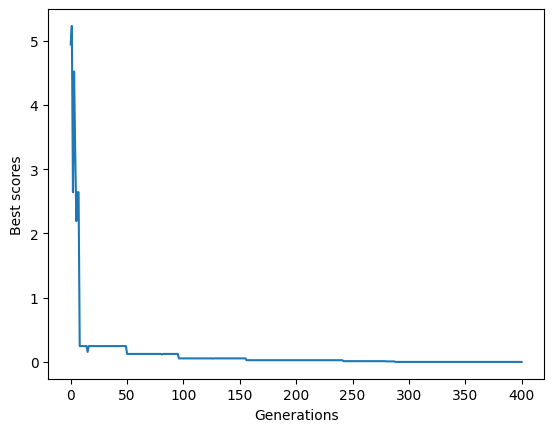

In [20]:
plot_scores(scores)

In [27]:
base_lenght = 1000
max_iter = 10000
pm = 0.03
pc = 0.9
solution_check = 1000

solutions, scores, all_populations, all_scores, iterations = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc, solution_check)

Simulating generation 1000. This generation info:
Lowest score: 0.004813447491784917
Best solution: [-0.00162799 -0.00039569]
Simulating generation 2000. This generation info:
Lowest score: 0.004813447491784917
Best solution: [-0.00162799 -0.00039569]


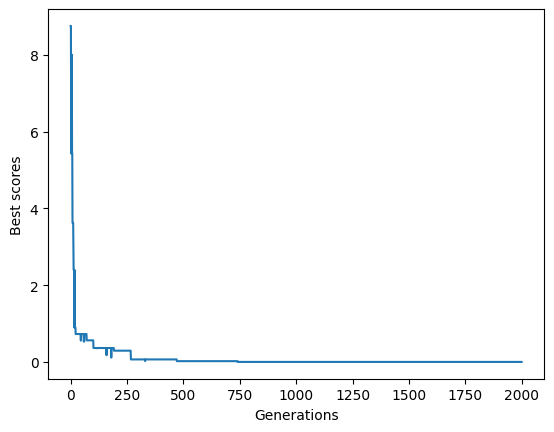

In [28]:
plot_scores(scores)

## 4. Conclusions

Evolutionary algorithm is better at finding global minimmum of a given function than simple gradient. However the solution it gives highly depend on starting parameters:
- `base_lenght`: Base population length. The larger it is the slower algorithm works but it has higher chances for a better solutions. It needs to be picked adequatly for amount of computation we have at our disposal and how precise solution we expect.
- `max_iter`: The maximum amount of iterations algorithm can achieve. Similarly to `base_length` the bigger it is the slower algorithm works. However, in my implementation, the limit of iterations is rarely hit because of additional stop condition.
- `pm`: Probability of mutation. It indicates how often a gen is mutated. It has to be quite close to 0 because mutations can highly impact the output data. If it is too large the solution could be a random number and algorithm is most likely to end due to max iterations limit.
- `pc`: Probability of crossover. Similarly, it tells how often crossover is performed. However this can, and should, be closer to 1 than 0, because it positively affects a search for solution. It could even be ecqual to 1 so crossover happens everytime.